# REDES NEURAIS CONVOLUCIONAIS - EXEMPLO 4 (Orlando) - CIFAR 10:

In [130]:
import random, keras, matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

Carregamento da base de dados (na primeira execução será feito o download)

In [117]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()

Mostra a imagem e a respectiva classe, de acordo com o índice passado como parâmetro. Você pode testar os seguintes índices para visualizar uma imagem de cada classe:
- Avião - 650
- Pássaro - 6
- Gato - 9
- Veado - 3
- Cachorro - 813
- Sapo - 651
- Cavalo - 652
- Barco - 811
- Caminhão - 970
- Automóvel - 4

Text(0.5, 1.0, 'Classe [1]')

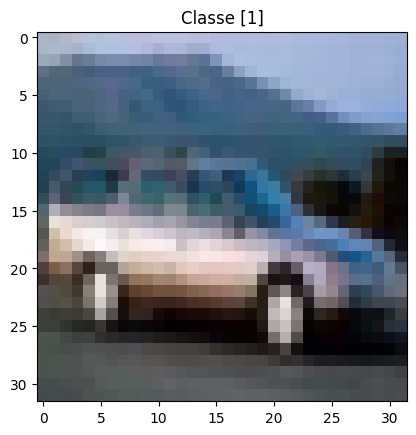

In [114]:
plt.imshow(X_treinamento[4])
plt.title('Classe '+ str(y_treinamento[4]))

As dimensões dessas imagens são 32x32 e o número de canais é 3 pois vamos utilizar as imagens coloridas.

In [121]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 32, 32, 3)
previsores_teste = X_teste.reshape(X_teste.shape[0], 32, 32, 3)

Conversão para float para podermos aplicar a normalização.

In [122]:
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

Normalização para os dados ficarem na escala entre 0 e 1 e agilizar o processamento.

In [123]:
previsores_treinamento /= 255
previsores_teste /= 255

Criação de variáveis do tipo dummy, pois teremos 10 saídas.

In [124]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

Criação da rede neural com duas camadas de convolução.

In [141]:
classificador = Sequential()
classificador.add(InputLayer(shape=(32, 32, 3)))

# Primeira camada convolucional
classificador.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda camada convolucional
classificador.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))

# Terceira camada convolucional
classificador.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten + densa
classificador.add(Flatten())
classificador.add(Dense(64, activation='relu'))
classificador.add(Dropout(0.3))
classificador.add(Dense(64, activation='relu'))
classificador.add(Dropout(0.3))
classificador.add(Dense(10, activation='softmax'))

classificador.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,010 (296.91 KB)

 Trainable params: 75,754 (295.91 KB)

 Non-trainable params: 256 (1.00 KB)

In [142]:
classificador.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#historico = classificador.fit(previsores_treinamento, classe_treinamento, batch_size=128, epochs=5, validation_data=(previsores_teste, classe_teste), verbose=2)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

historico = classificador.fit(previsores_treinamento, classe_treinamento, batch_size=1000, epochs=50, validation_data=(previsores_teste, classe_teste), verbose=2, callbacks=[early_stop])

Epoch 1/50
50/50 - 16s - 327ms/step - accuracy: 0.2277 - loss: 2.1506 - val_accuracy: 0.1512 - val_loss: 2.4013
Epoch 2/50
50/50 - 19s - 389ms/step - accuracy: 0.3837 - loss: 1.7015 - val_accuracy: 0.1030 - val_loss: 2.9252
Epoch 3/50
50/50 - 24s - 485ms/step - accuracy: 0.4632 - loss: 1.4816 - val_accuracy: 0.1181 - val_loss: 3.4234
Epoch 4/50
50/50 - 24s - 481ms/step - accuracy: 0.5185 - loss: 1.3454 - val_accuracy: 0.1057 - val_loss: 3.7558
Epoch 5/50
50/50 - 24s - 472ms/step - accuracy: 0.5602 - loss: 1.2339 - val_accuracy: 0.1355 - val_loss: 3.6474
Epoch 6/50
50/50 - 24s - 476ms/step - accuracy: 0.5960 - loss: 1.1455 - val_accuracy: 0.1485 - val_loss: 3.9251


In [136]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

print(f"\nPerda (loss): {resultado[0]:.4f}")
print(f"\nAcurácia (accuracy): {resultado[1] * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7265 - loss: 0.7937

Perda (loss): 0.7969

Acurácia (accuracy): 72.76%


In [140]:
classificador.save(r"C:\Users\CLIENTE\Downloads\Deep Learning com Python de A a Z\Parte 2 - Redes Neurais Convolucionais\dígitos\CIFAR10_Orlando.ipynb.keras")  # <<<< salvando aqui

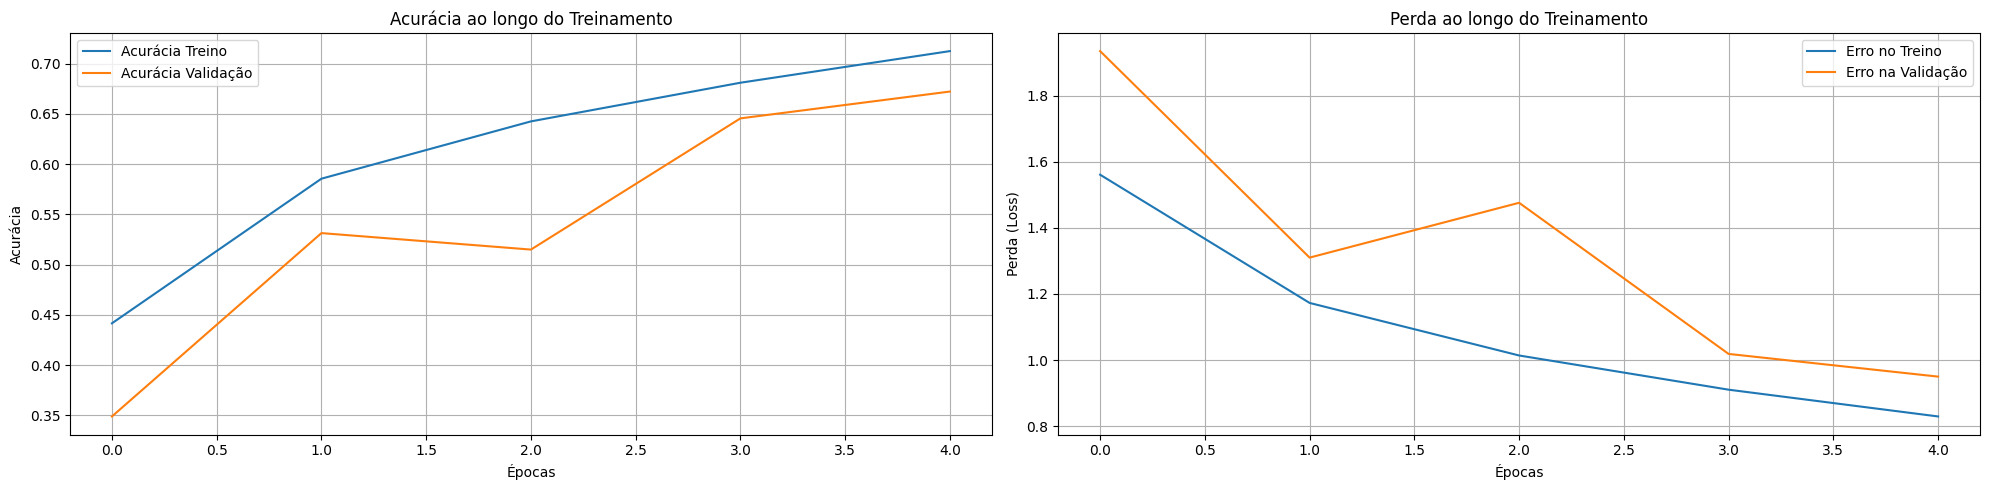

In [12]:
# Criar figura com 2 subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# --- Gráfico da Acurácia ---
axs[0].plot(historico.history['accuracy'], label='Acurácia Treino')
axs[0].plot(historico.history['val_accuracy'], label='Acurácia Validação')
axs[0].set_title('Acurácia ao longo do Treinamento')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend()
axs[0].grid(True)

# --- Gráfico da Perda ---
axs[1].plot(historico.history['loss'], label='Erro no Treino')
axs[1].plot(historico.history['val_loss'], label='Erro na Validação')
axs[1].set_title('Perda ao longo do Treinamento')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda (Loss)')
axs[1].legend()
axs[1].grid(True)

# Ajustar o layout para não sobrepor
plt.tight_layout()
plt.show()

In [ ]:
# Previsões diretamente com os arrays
y_prob = classificador.predict(previsores_teste)
y_pred = np.argmax(y_prob, axis=1)  # classe prevista
y_true = np.argmax(classe_teste, axis=1)  # classe verdadeira

# Relatório
classes_cifar10 = [
    'avião',        # 0
    'automóvel',    # 1
    'pássaro',      # 2
    'gato',         # 3
    'veado',        # 4
    'cachorro',     # 5
    'sapo',         # 6
    'cavalo',       # 7
    'navio',        # 8
    'caminhão'      # 9
]
relatorio_dict = classification_report(y_true, y_pred, output_dict=True, target_names=classes_cifar10)
relatorio_df = pd.DataFrame(relatorio_dict).T

# Converter para %
for coluna in ['precision', 'recall', 'f1-score']:
    relatorio_df[coluna] *= 100

relatorio_df = relatorio_df.round(5)
relatorio_df = relatorio_df[['precision', 'recall', 'f1-score', 'support']]
relatorio_df.columns = ['Precisão (%)', 'Revocação (%)', 'F1-Score (%)', 'Suporte']

# Exibir bonito
espaco = 14
print("\n" + "Relatório de Classificação (em porcentagem):".center(espaco * 5))
print("-" * (espaco * 5))
print(f"{'Classe':<{espaco}}{'Precisão (%)':>{espaco}}{'Recall (%)':>{espaco}}{'F1-Score (%)':>{espaco}}{'Suporte':>{espaco}}")
print("-" * (espaco * 5))
for idx, row in relatorio_df.iterrows():
    print(f"{idx:<{espaco}}{row['Precisão (%)']:>{espaco}.5f}{row['Revocação (%)']:>{espaco}.5f}{row['F1-Score (%)']:>{espaco}.5f}{row['Suporte']:>{espaco}.0f}")
print("-" * (espaco * 5))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

             Relatório de Classificação (em porcentagem):             
----------------------------------------------------------------------
Classe          Precisão (%)    Recall (%)  F1-Score (%)       Suporte
----------------------------------------------------------------------
avião               71.95496      70.30000      71.11786          1000
automóvel           89.22306      71.20000      79.19911          1000
pássaro             54.83871      54.40000      54.61847          1000
gato                53.35052      41.40000      46.62162          1000
veado               51.75913      76.50000      61.74334          1000
cachorro            69.55720      37.70000      48.89754          1000
sapo                72.49527      76.70000      74.53839          1000
cavalo              71.27072      77.40000      74.20901          1000
navio               68.84058      85.50000      76.27119          1000
caminhão            77.25975      8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


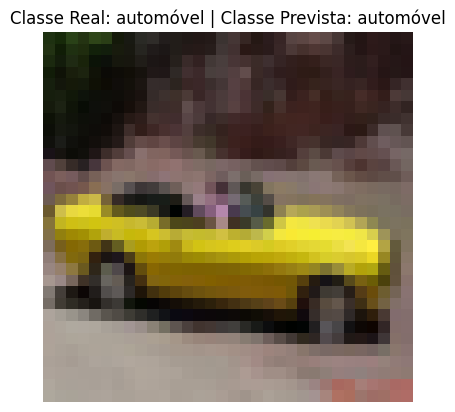


Tabela de Probabilidades Previstas:
   Classe  Probabilidade (%)
automóvel           99.22044
 caminhão            0.54581
    avião            0.21416
    navio            0.01044
  pássaro            0.00346
     sapo            0.00180
    veado            0.00166
     gato            0.00095
   cavalo            0.00073
 cachorro            0.00054


In [48]:
testar_uma_imagem = True  # Ativa o teste individual

if testar_uma_imagem:
    # Selecionar um índice aleatório da base de teste
    indice = random.randint(0, previsores_teste.shape[0] - 1)

    # Selecionar imagem e classe real
    imagem = previsores_teste[indice]
    label_real = np.argmax(classe_teste[indice])  # de one-hot para índice

    # Preparar imagem para predição (expande para batch com 1 amostra)
    imagem_exp = np.expand_dims(imagem, axis=0)

    # Fazer predição com o modelo
    pred = classificador.predict(imagem_exp)
    classe_prevista = np.argmax(pred[0])  # índice da classe prevista

    # Lista de nomes das classes CIFAR-10
    classes_cifar10 = [
        'avião',        # 0
        'automóvel',    # 1
        'pássaro',      # 2
        'gato',         # 3
        'veado',        # 4
        'cachorro',     # 5
        'sapo',         # 6
        'cavalo',       # 7
        'navio',        # 8
        'caminhão'      # 9
    ]

    nome_classe_real = classes_cifar10[label_real]
    nome_classe_prevista = classes_cifar10[classe_prevista]

    # Mostrar imagem com título das classes
    plt.imshow(imagem)
    plt.title(f"Classe Real: {nome_classe_real} | Classe Prevista: {nome_classe_prevista}")
    plt.axis('off')
    plt.show()

    # Obter e formatar probabilidades de todas as classes
    probs_percent = (pred[0] * 100).round(5)
    tabela_prob = pd.DataFrame({
        'Classe': classes_cifar10,
        'Probabilidade (%)': probs_percent
    })

    # Ordenar da maior para a menor probabilidade
    tabela_prob = tabela_prob.sort_values(by='Probabilidade (%)', ascending=False)

    # Exibir tabela
    pd.options.display.float_format = '{:.5f}'.format
    print("\nTabela de Probabilidades Previstas:")
    print(tabela_prob.to_string(index=False))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


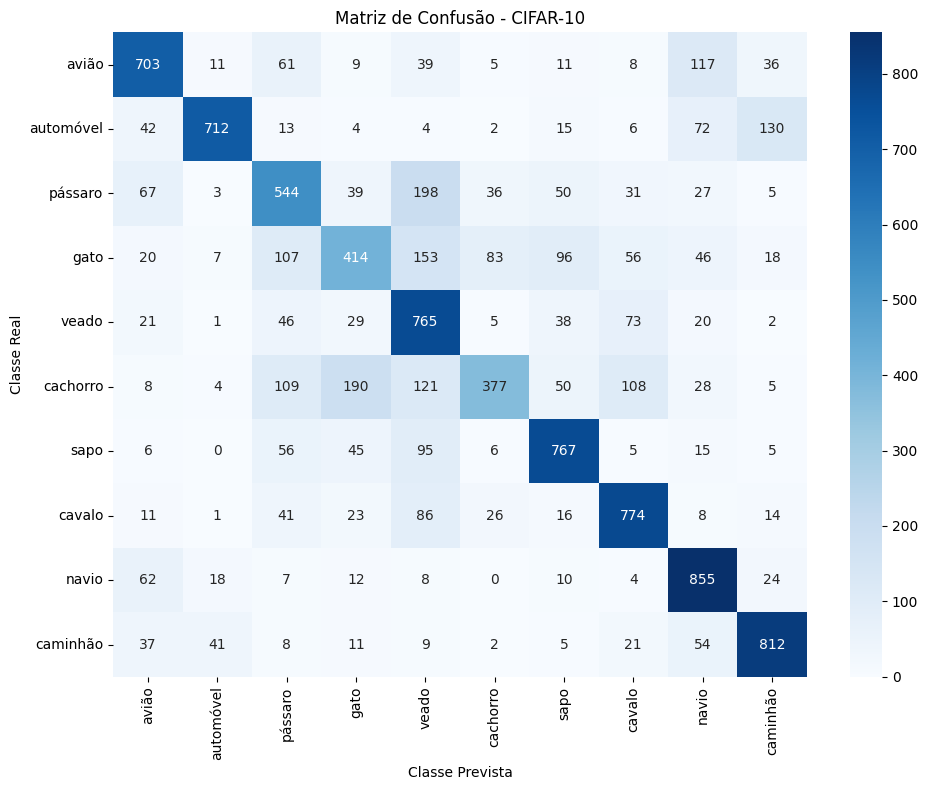

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Previsões do modelo para todos os dados da base de teste
y_prob = classificador.predict(previsores_teste)
y_pred = np.argmax(y_prob, axis=1)  # classe prevista
y_true = np.argmax(classe_teste, axis=1)  # classe verdadeira

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Lista de nomes das classes CIFAR-10
classes_cifar10 = [
    'avião',        # 0
    'automóvel',    # 1
    'pássaro',      # 2
    'gato',         # 3
    'veado',        # 4
    'cachorro',     # 5
    'sapo',         # 6
    'cavalo',       # 7
    'navio',        # 8
    'caminhão'      # 9
]

# Plot da matriz
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_cifar10, yticklabels=classes_cifar10)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - CIFAR-10")
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


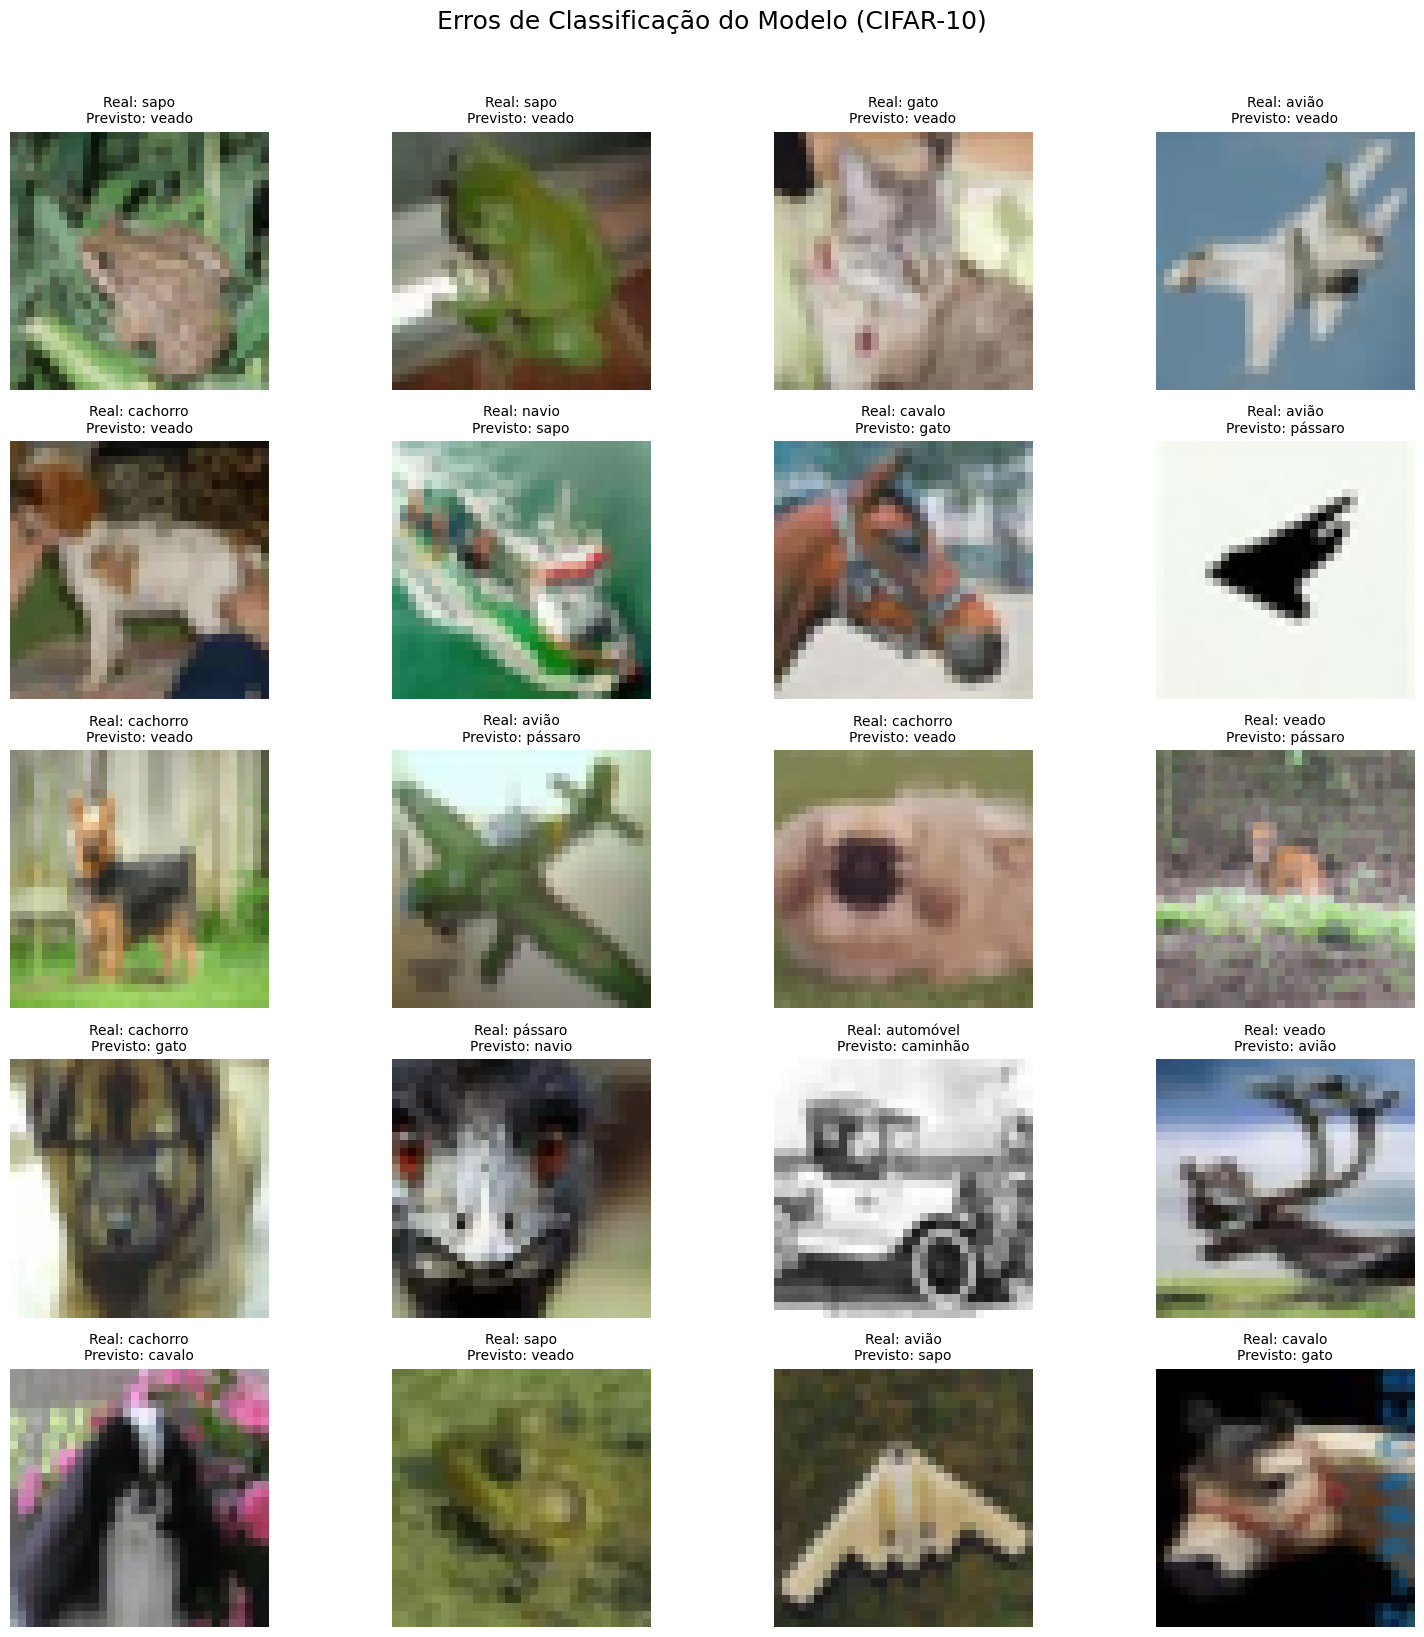

In [ ]:
# Obter previsões do classificador
y_pred_prob = classificador.predict(previsores_teste)
y_pred = np.argmax(y_pred_prob, axis=1)           # Classes previstas
y_true = np.argmax(classe_teste, axis=1)          # Converte one-hot para inteiros

# Nomes das classes CIFAR-10
classes_cifar10 = [
    'avião', 'automóvel', 'pássaro', 'gato', 'veado',
    'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão'
]
indice_para_nome = {i: nome for i, nome in enumerate(classes_cifar10)}

# Listas para armazenar erros
imagens_com_erro = []
rotulos_reais = []
rotulos_previstos = []

# Identificar erros
for idx in range(len(y_true)):
    if y_true[idx] != y_pred[idx]:
        imagens_com_erro.append(previsores_teste[idx])
        rotulos_reais.append(y_true[idx])
        rotulos_previstos.append(y_pred[idx])

# Limita a quantidade de erros que serão plotados
limite_erros = 20
imagens_com_erro = imagens_com_erro[:limite_erros]
rotulos_reais = rotulos_reais[:limite_erros]
rotulos_previstos = rotulos_previstos[:limite_erros]

# ---------- PLOTAGEM DOS ERROS EM GRADE ---------- #
num_erros = len(imagens_com_erro)
cols = 4
rows = int(np.ceil(num_erros / cols))
altura_figura = min(rows * 3.2, 30)  # Limita a altura da figura para evitar erro de renderização

plt.figure(figsize=(16, altura_figura))
for i in range(num_erros):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imagens_com_erro[i])  # CIFAR-10 já está com shape (32,32,3)
    real = indice_para_nome[rotulos_reais[i]]
    pred = indice_para_nome[rotulos_previstos[i]]
    plt.title(f"Real: {real}\nPrevisto: {pred}", fontsize=10)
    plt.axis('off')

plt.suptitle("Erros de Classificação do Modelo (CIFAR-10)", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig("C:/Users/CLIENTE/Downloads/erros_classificacao_grid_cifar10.png", dpi=300, bbox_inches='tight')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


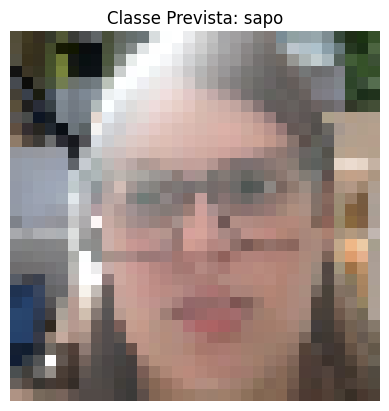


Tabela de Probabilidades Previstas:
   Classe  Probabilidade (%)
     sapo           27.05120
     gato           26.29264
 cachorro           24.68976
    veado           10.33998
  pássaro            4.91210
   cavalo            4.36246
    navio            1.04064
 caminhão            0.67357
    avião            0.37809
automóvel            0.25956


In [59]:
# Lista de classes do CIFAR-10
classes_cifar10 = [
    'avião', 'automóvel', 'pássaro', 'gato', 'veado',
    'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão'
]

# Caminho da imagem a ser testada
caminho_imagem = r"C:\Users\CLIENTE\Downloads\giovanna3.jpg"

# Carregar e pré-processar a imagem
imagem_externa = image.load_img(caminho_imagem, target_size=(32, 32))  # CIFAR-10 usa 32x32
imagem_array = image.img_to_array(imagem_externa) / 255.0  # Normalização
imagem_exp = np.expand_dims(imagem_array, axis=0)  # Adiciona dimensão do batch

# Realizar a predição com a rede multiclasses
pred = classificador.predict(imagem_exp)

# Obter índice da classe com maior probabilidade
classe_prevista = np.argmax(pred[0])
nome_classe_prevista = classes_cifar10[classe_prevista]

# Exibir a imagem com o nome da classe prevista
plt.imshow(imagem_array)
plt.title(f"Classe Prevista: {nome_classe_prevista}")
plt.axis('off')
plt.show()

# Obter todas as probabilidades em porcentagem
probs_percent = (pred[0] * 100).round(5)

# Criar tabela ordenada por maior probabilidade
tabela_prob = pd.DataFrame({
    "Classe": classes_cifar10,
    "Probabilidade (%)": probs_percent
}).sort_values(by="Probabilidade (%)", ascending=False)

# Mostrar a tabela
pd.options.display.float_format = '{:.5f}'.format
print("\nTabela de Probabilidades Previstas:")
print(tabela_prob.to_string(index=False))


# Se caso quisesse melhor as imagens, aumentando a qualidade para 128 x 128 usando o OpenCv:

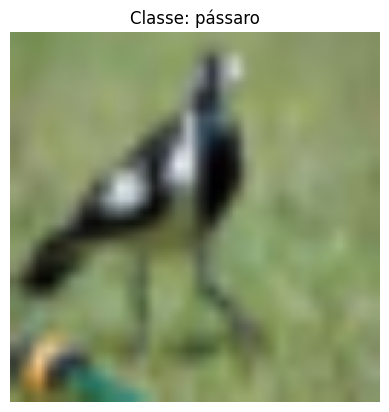

In [112]:
import matplotlib.pyplot as plt
import random

# Lista de nomes das classes do CIFAR-10
classes_cifar10 = ['avião', 'automóvel', 'pássaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

# Gera um índice aleatório
indice = random.randint(0, len(previsores_treinamento) - 1)

# Pega a imagem e a classe
imagem = previsores_treinamento[indice]
classe = classes_cifar10[y_treinamento[indice][0]]

# Exibe
plt.imshow(imagem)
plt.title(f"Classe: {classe}")
plt.axis('off')
plt.show()

# Se eu quisesse carregar o modelo e usá-lo

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 🔹 Carregar o modelo treinado
modelo = load_model("meu_modelo.h5")  # ou "meu_modelo.keras"

# 🔹 Lista de classes do CIFAR-10
classes_cifar10 = [
    'avião', 'automóvel', 'pássaro', 'gato', 'veado',
    'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão'
]

# 🔹 Função para prever uma imagem
def prever_imagem(caminho_imagem):
    # 1. Carrega e redimensiona para 32x32 (padrão CIFAR-10)
    img = image.load_img(caminho_imagem, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_exp = np.expand_dims(img_array, axis=0)

    # 2. Predição
    pred = modelo.predict(img_exp)

    # 3. Índice da classe prevista
    classe_idx = np.argmax(pred[0])
    nome_classe = classes_cifar10[classe_idx]

    # 4. Tabela de probabilidades
    probs_percent = (pred[0] * 100).round(5)
    tabela_prob = pd.DataFrame({
        "Classe": classes_cifar10,
        "Probabilidade (%)": probs_percent
    }).sort_values(by="Probabilidade (%)", ascending=False)

    # 5. Exibir imagem com classe prevista
    plt.imshow(img_array)
    plt.title(f"Classe Prevista: {nome_classe}")
    plt.axis('off')
    plt.show()

    # 6. Exibir tabela
    pd.options.display.float_format = '{:.5f}'.format
    print("\nTabela de Probabilidades Previstas:")
    print(tabela_prob.to_string(index=False))

    return nome_classe, tabela_prob

# 🔹 Caminho da imagem
caminho = r"C:\Users\CLIENTE\Downloads\giovanna3.jpg"

# 🔹 Rodar
prever_imagem(caminho)
